In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## 1a:

In [2]:
df_cmp = pd.read_csv("compounds.csv")
df_cmp.head()

,A,B,C,D,type
0,6.4,2.9,4.3,1.3,amide
1,5.7,4.4,1.5,0.4,phenol
2,6.7,3.0,5.2,2.3,ether
3,5.8,2.8,5.1,2.4,ether
4,6.4,3.2,5.3,2.3,ether


In [3]:
df_feats = df_cmp.copy().drop(columns = 'type')
df_feats.head()

,A,B,C,D
0,6.4,2.9,4.3,1.3
1,5.7,4.4,1.5,0.4
2,6.7,3.0,5.2,2.3
3,5.8,2.8,5.1,2.4
4,6.4,3.2,5.3,2.3


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_feats.values)
ar_feats_nml = scaler.transform(df_feats.values)

In [5]:
df_feats_nml = pd.DataFrame(ar_feats_nml, columns = df_feats.columns)
df_feats_nml.head()

,A,B,C,D
0,0.583333,0.375000,0.559322,0.500000
1,0.388889,1.000000,0.084746,0.125000
2,0.666667,0.416667,0.711864,0.916667
3,0.416667,0.333333,0.694915,0.958333
4,0.583333,0.500000,0.728814,0.916667


In [6]:
print(df_feats_nml.min(), df_feats_nml.max())

A    0.0
B    0.0
C    0.0
D    0.0
dtype: float64 A    1.0
B    1.0
C    1.0
D    1.0
dtype: float64


In [7]:
df_feats_nml.corr()

,A,B,C,D
A,1.000000,-0.109369,0.871754,0.817954
B,-0.109369,1.000000,-0.420516,-0.356544
C,0.871754,-0.420516,1.000000,0.962757
D,0.817954,-0.356544,0.962757,1.000000


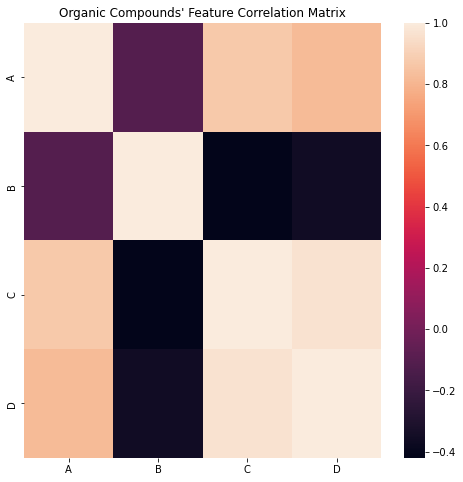

In [8]:
plt.figure(figsize = (8,8))
plt.title('Organic Compounds\' Feature Correlation Matrix')
sns.heatmap(df_feats_nml.corr());

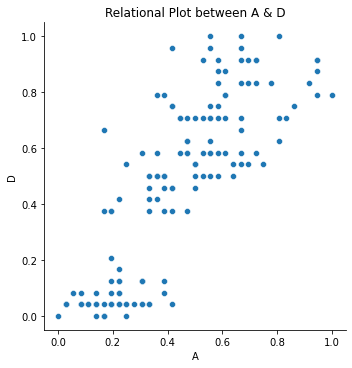

In [9]:
sns.relplot(data= df_feats_nml, x = 'A', y = 'D')
plt.title('Relational Plot between A & D');

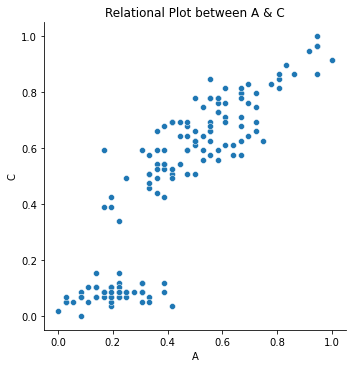

In [10]:
sns.relplot(data = df_feats_nml, x = 'A', y = 'C')
plt.title('Relational Plot between A & C');

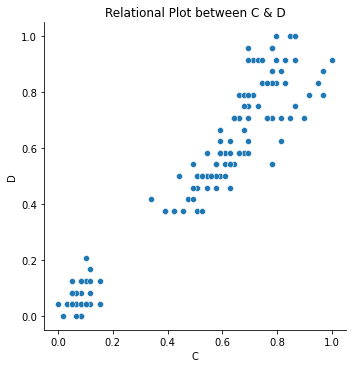

In [11]:
sns.relplot(data = df_feats_nml, x = 'C', y = 'D')
plt.title('Relational Plot between C & D');

It appears A & D are highly positively correlated with each other, C & D are highly positively correlated with each other, and A & C are highly positively correlated with each other as well. If I was to order the reagent pairs based on increasing correlation, it would be A & D, A & C, and C & D. 

## Q1b:

Kmeans clustering

In [12]:
import warnings

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ 
        Do KMeans clustering; Each feature is assumed to be normalized within range of [0,1]
        input_points: np.array shape(ndata,nfeatures). 
        
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if len(np.unique(new_assignments))<self.K:
            return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            centroids = np.array([input_points[new_assignments == i].mean(axis = 0) for i in set(new_assignments)])
            assignments = new_assignments # How does loop not break?
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        distances = np.array([np.sum((data_points - i)** 2, axis = 1) for i in centroids]).T
        new_assignments = np.argmin(distances, axis= 1)
        return new_assignments
        
   
        

In [13]:
kmns = KMeans(K = 2)
new_assign = kmns.cluster(df_feats_nml)
new_assign.shape

(150,)

In [14]:
df_newassign = df_feats_nml.copy()
df_newassign['New Assign'] = new_assign
df_newassign.head()

,A,B,C,D,New Assign
0,0.583333,0.375000,0.559322,0.500000,0
1,0.388889,1.000000,0.084746,0.125000,1
2,0.666667,0.416667,0.711864,0.916667,0
3,0.416667,0.333333,0.694915,0.958333,0
4,0.583333,0.500000,0.728814,0.916667,0


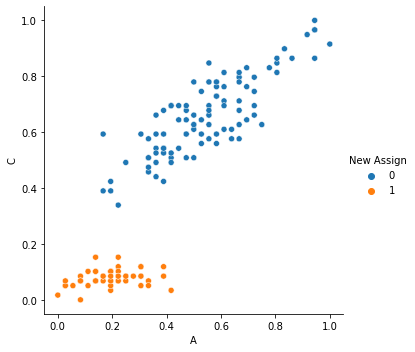

In [15]:
sns.relplot(data = df_newassign, x = 'A', y = 'C', hue = 'New Assign');

In [16]:
kmns = KMeans(K = 4)
new_assign = kmns.cluster(df_feats_nml)
new_assign.shape

(150,)

In [17]:
df_newassign['New Assign'] = new_assign
df_newassign.head()

,A,B,C,D,New Assign
0,0.583333,0.375000,0.559322,0.500000,3
1,0.388889,1.000000,0.084746,0.125000,2
2,0.666667,0.416667,0.711864,0.916667,0
3,0.416667,0.333333,0.694915,0.958333,0
4,0.583333,0.500000,0.728814,0.916667,0


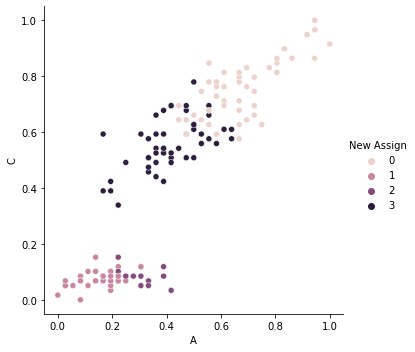

In [18]:
sns.relplot(data = df_newassign, x = 'A', y = 'C', hue = 'New Assign');

In [19]:
kmns = KMeans(K = 3)
new_assign = kmns.cluster(df_feats_nml)
new_assign.shape

(150,)

In [20]:
df_newassign['New Assign'] = new_assign
df_newassign.head()

,A,B,C,D,New Assign
0,0.583333,0.375000,0.559322,0.500000,2
1,0.388889,1.000000,0.084746,0.125000,0
2,0.666667,0.416667,0.711864,0.916667,1
3,0.416667,0.333333,0.694915,0.958333,1
4,0.583333,0.500000,0.728814,0.916667,1


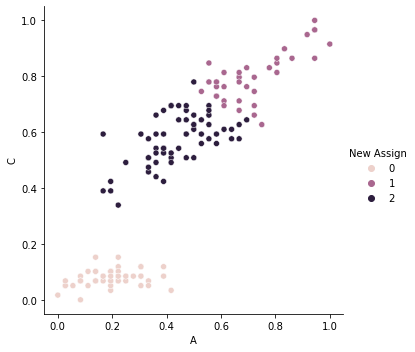

In [21]:
sns.relplot(data = df_newassign, x = 'A', y = 'C', hue = 'New Assign');

Honestly, aside from K = 4 clusters, from the visualizations K = 2 and K = 3 both make sense. If I had to choose between K = 2 and K = 3, I would choose K = 3 as the K value that makes the most sense to me because the large cluster looks like 2 clusters sitting side by side to each other. 

## (c)

Validate function for computing the accuracy of prediction

In [22]:
def validate(y_hat,y):
    """print accuracy of prediction for each class for the compounds dataset
    yhat: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / groudn truths.
    """
    # correct classification
    compounds = np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_hat)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_hat has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_hat==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')

In [23]:
validate(new_assign, df_cmp['type'])

Class 0 - phenol: 50 out of 50 are classified correctly
Class 1 - ether: 36 out of 50 are classified correctly
Class 2 - amide: 47 out of 49 are classified correctly


The classification is classifying 2 classes: phenol and amide really well, but is not so great at classifying ether well. Essentially, the classification is doing well at classifying the one isolated cluster well, but is having lesser success in classifying each of the 2 classes clustered close to each other.

## 1d:

In [24]:
import warnings

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ 
        Do KMeans clustering; Each feature is assumed to be normalized within range of [0,1]
        input_points: np.array shape(ndata,nfeatures). 
        
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        # if len(np.unique(new_assignments))<self.K:
        #   return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            centroids = np.array([input_points[new_assignments == i].mean(axis = 0) for i in set(new_assignments)])
            assignments = new_assignments # How does loop not break?
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        distances = np.array([np.sum((data_points - i)** 2, axis = 1) for i in centroids]).T
        new_assignments = np.argmin(distances, axis= 1)
        return new_assignments
        
   
        

In [25]:
kmns = KMeans(K = 4)
new_assign = kmns.cluster(df_feats_nml)
new_assign.shape

/var/folders/0d/bctf7h1120b_tx8n4hdjlhm80000gn/T/ipykernel_35132/2433494517.py:33: UserWarning: At least one centroid vanishes
  warnings.warn('At least one centroid vanishes')


(150,)

In [26]:
df_newassign['New Assign'] = new_assign
df_newassign.head()

,A,B,C,D,New Assign
0,0.583333,0.375000,0.559322,0.500000,2
1,0.388889,1.000000,0.084746,0.125000,0
2,0.666667,0.416667,0.711864,0.916667,1
3,0.416667,0.333333,0.694915,0.958333,1
4,0.583333,0.500000,0.728814,0.916667,1


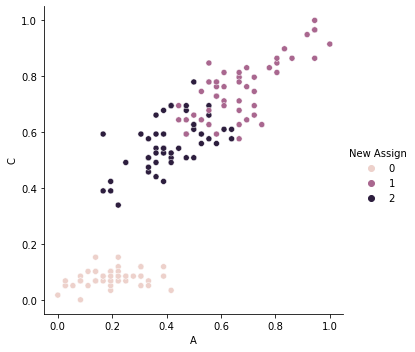

In [27]:
sns.relplot(data = df_newassign, x = 'A', y = 'C', hue = 'New Assign');

If I comment out the reinitialization of the centroid when the initial assignment is not great, I run into a warning indicating at least one of the centroids have vanished. This warning is a result of the centroids being so close to each other that there is overlap in the class assignments resulting in the number of unique assigned classes being less than 4. Thus, depending on the position of the initial centroids, you could run into this error. You could avoid this issue by reinitializing the centroid as the original code intended to do or run multiple iterations as it is right now and report the average cluster assignments over all of the iterations. 

## Q3

## (a)

DBSCAN Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

Here's how you can use DBSCAN:

In [28]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps= 0.21, min_samples=27)
clustering = db.fit(df_feats_nml)
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
print(clustering.labels_)
# Indices of core samples.
clustering.core_sample_indices_



[ 1 -1 -1 -1 -1  0 -1 -1  1  1  1 -1  0 -1  0  0  1 -1  1  0  0  1 -1  1
  0 -1  0  0  0  1 -1  0 -1  0 -1 -1  0  1  1  0  1  1 -1  1  0  1 -1  1
  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  0  0  1  0  1 -1  0 -1  0  1  1  0  0
 -1  1  1  0  1  1  1  1 -1  0  0 -1  1  1  1  1  1  1  1 -1  0  0  0  0
  1 -1  1  0 -1  1  1  1  1  0  0  0  0  1 -1  0  0 -1  1  1  0  0  0 -1
  0  0  0  1 -1 -1  1 -1 -1  0 -1  1 -1  1 -1 -1  0  1  0  1  1  0  1  0
  1  0  1  1  1  1]


array([ 14,  19,  20,  27,  28,  31,  33,  37,  38,  39,  43,  45,  55,
        59,  60,  62,  63,  65,  78,  81,  82,  93, 105, 106, 107, 108,
       109, 112, 117, 118, 120, 122, 136, 141, 143, 148])

In [29]:
df_newassign['New Assign'] = clustering.labels_
df_newassign.head()

,A,B,C,D,New Assign
0,0.583333,0.375000,0.559322,0.500000,1
1,0.388889,1.000000,0.084746,0.125000,-1
2,0.666667,0.416667,0.711864,0.916667,-1
3,0.416667,0.333333,0.694915,0.958333,-1
4,0.583333,0.500000,0.728814,0.916667,-1


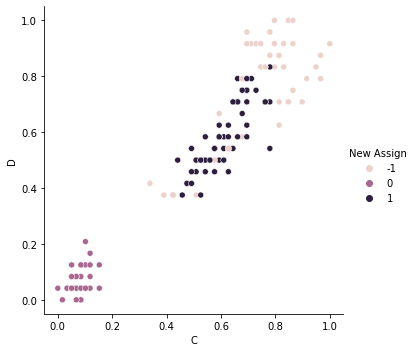

In [30]:
sns.relplot(data = df_newassign, x = 'C', y = 'D', hue = 'New Assign')

Some helper codes to visualize results. You'll likely need to modify variable names to align with your own code.

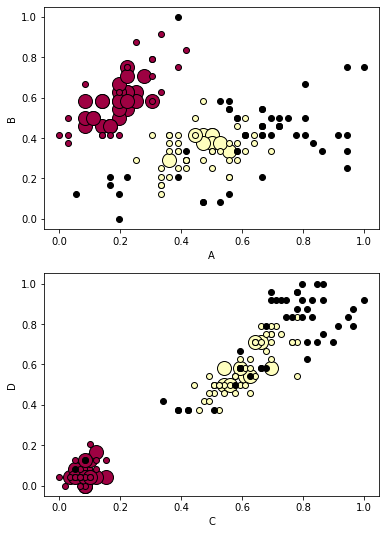

In [31]:
import matplotlib.pyplot as plt
labels = clustering.labels_
x_norm = df_feats_nml
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1,figsize=(6,9))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    core_samples_mask = x_norm.index.isin(clustering.core_sample_indices_)
    #A&B
    #plot core points
    xy = x_norm[class_member_mask & core_samples_mask].values
    ax1.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    #plot border points
    xy = x_norm[class_member_mask & ~core_samples_mask].values
    ax1.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    
    #C&D
    #plot core points
    xy = x_norm[class_member_mask & core_samples_mask].values
    ax2.plot(
        xy[:, 2],
        xy[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
   )

    #plot border points
    xy = x_norm[class_member_mask & ~core_samples_mask].values
    ax2.plot(
        xy[:, 2],
        xy[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

ax1.set_xlabel('A')
ax1.set_ylabel('B')
ax2.set_xlabel('C')
ax2.set_ylabel('D')
plt.show()

DBSCAN is not as effective as KMeans in classifying this data because the yellow and black clusters are in close proximity to each other. 

In [32]:
print('Number of core points: ', len(clustering.core_sample_indices_))
print('Number of noise points: ', sum(clustering.labels_ == -1))

Number of core points:  36
Number of noise points:  43


There are around 36 core points, 43 noise points, and 11 border points.

## 2b:

Here's the noisy moon dataset!

(array([[ 0.49627131, -0.34275349],
       [-0.16629956,  0.92234209],
       [ 0.71895601,  0.66529038],
       ...,
       [ 1.90950927,  0.02989686],
       [ 0.54623069, -0.36003133],
       [ 0.04090016,  0.37069297]]), array([1, 0, 0, ..., 1, 1, 1]))


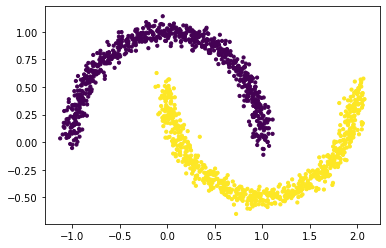

In [33]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pylab import *

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

In [34]:
db = DBSCAN(eps= 0.21, min_samples=10)
clustering = db.fit(X)
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
print(clustering.labels_)
# Indices of core samples.
clustering.core_sample_indices_

[0 1 1 ... 0 0 0]


array([   0,    1,    2, ..., 1497, 1498, 1499])

In [35]:
df_nos_moon = pd.DataFrame(data = X, columns = ['zero', 'one'])
df_nos_moon['labels'] = clustering.labels_
df_nos_moon.head()

,zero,one,labels
0,0.496271,-0.342753,0
1,-0.166300,0.922342,1
2,0.718956,0.665290,1
3,-0.337840,0.912074,1
4,0.103768,0.116946,0


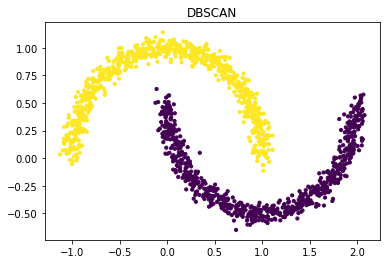

In [36]:
plt.scatter(data= df_nos_moon,x = 'zero',y = 'one', s=10, c= 'labels')
plt.title('DBSCAN');

In [37]:
kmns = KMeans(K = 2)
new_assign = kmns.cluster(X)
new_assign.shape

(1500,)

In [38]:
df_nos_moon = pd.DataFrame(data = X, columns = ['zero', 'one'])
df_nos_moon['labels'] = new_assign
df_nos_moon.head()

,zero,one,labels
0,0.496271,-0.342753,0
1,-0.166300,0.922342,1
2,0.718956,0.665290,0
3,-0.337840,0.912074,1
4,0.103768,0.116946,1


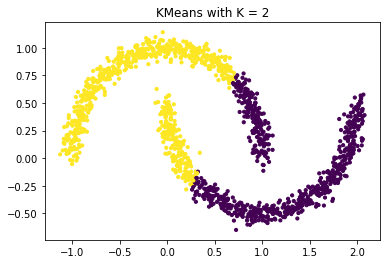

In [39]:
plt.scatter(data= df_nos_moon,x = 'zero',y = 'one', s=10, c= 'labels');
plt.title('KMeans with K = 2');

DBSCAN worked much better than KMeans in classifying this dataset where each cluster is its own half-circle or crescent moon.